# HR Analytics Case Study

# Problem statement
### The required data set is people.csv

Create an HR analytics to analyse and identify the company's employees attrition-causing aspects. The solution must provide insight into the basic causes of employee attrition, such as to observe possible trends, patterns, or certain factors impacting attrition. Provide practical suggestions and approaches for reducing attrition rates and enhance retention of staff in considering the results obtained.

### Prediction values:
Analysis of the factors causing employee attrition in great detail, with visualisations

Identification of crucial attrition related trends, patterns, or significant occurrences.

Actionable recommendations for HR and management to handle staff retention addresses and minimise the turnover.

The efficiency of utilised techniques and their effect on attrition rates are regularly reported and updated.

continuous monitoring and analysis to identify potential attrition trends or problems that require additional focus or response.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('people.csv')
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.shape

(14999, 10)

In [5]:
df.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

In [7]:
df.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

In [8]:
correlation = df.corr()
correlation

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_18348\3035769115.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
satisfactoryLevel,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
lastEvaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
numberOfProjects,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
avgMonthlyHours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
timeSpent.company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
workAccident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotionInLast5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<Axes: >

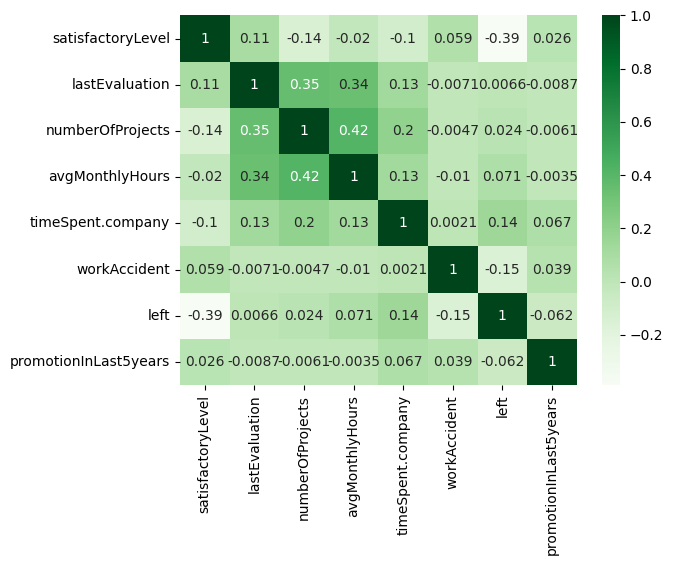

In [9]:
sns.heatmap(correlation, annot = True, cmap ='Greens' )
#annot is parameter that is used to show value of correlation on graph

<Axes: xlabel='numberOfProjects', ylabel='count'>

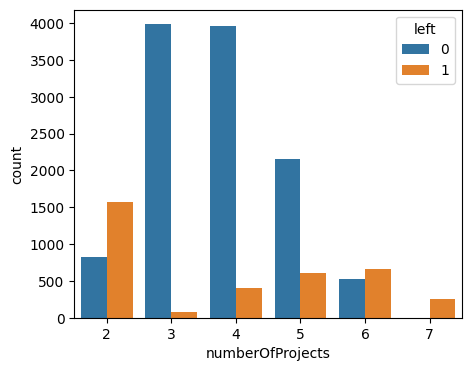

In [10]:
#Number of projects   (0 - not left company and 1 -left the company)
fig=plt.figure(figsize=(5,4))
sns.countplot(data=df,x="numberOfProjects", hue="left")

- 2 projects 
- 7 projects
- fair ammount of distribution of projects should be there

<Axes: xlabel='timeSpent.company', ylabel='count'>

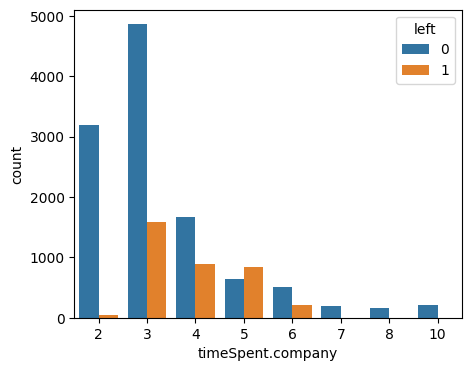

In [15]:
#timeSpent.company
fig=plt.figure(figsize=(5,4))
sns.countplot(x="timeSpent.company",hue='left',data=df)

- inbetween after 3 to 6 years people are leaving 
- 5th year is crusial year for the company

<Axes: xlabel='workAccident', ylabel='count'>

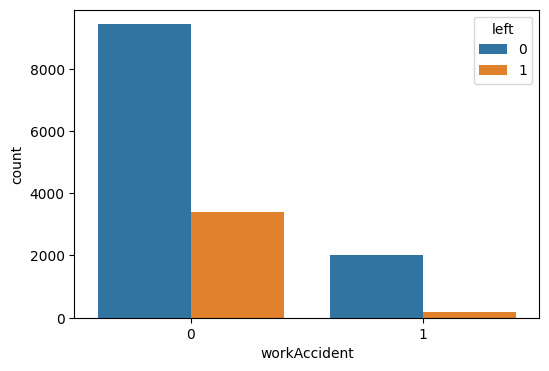

In [21]:
#workAccident
fig = plt.figure(figsize = (6,4))
sns.countplot(x = 'workAccident', hue = 'left', data = df)

 conclusion: this column is not important and does not have any impact on    attrition

<Axes: xlabel='promotionInLast5years', ylabel='count'>

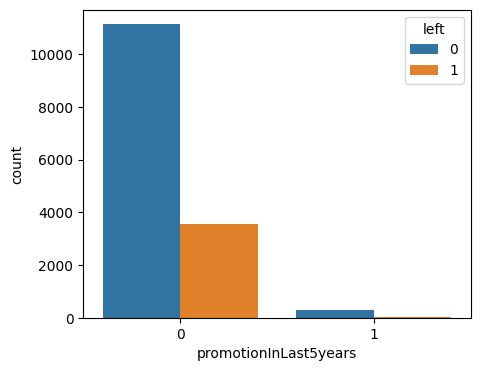

In [25]:
#promotionInLast5years
fig = plt.figure(figsize = (5,4))
sns.countplot(x = 'promotionInLast5years', hue = 'left', data = df)

- con: pople are not having promotion are leaving the company

- solution: promote the employee on the basis of skills and the work

<Axes: xlabel='dept', ylabel='count'>

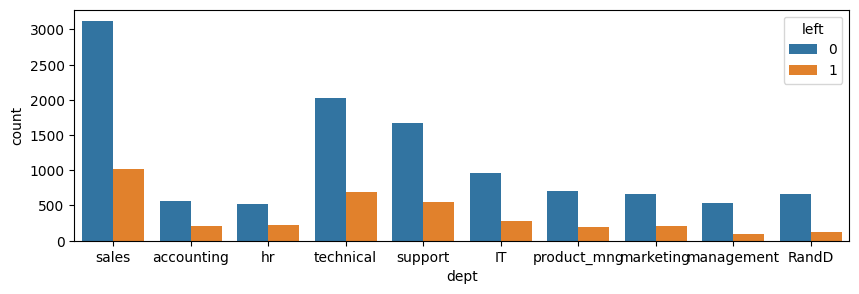

In [33]:
#dept
fig = plt.figure(figsize = (10,3))
x = df['dept']
y = df['left']

sns.countplot(x = 'dept', hue = 'left', data = df)

- con: technical and support persons are the employees that are leaving

- sug: we should more focus on technical and support

<Axes: xlabel='salary', ylabel='count'>

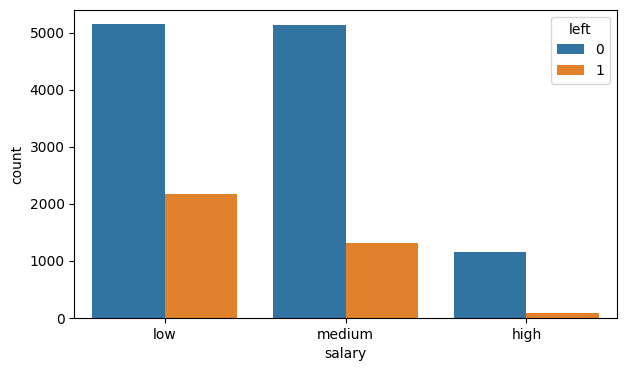

In [37]:
#salary
fig=plt.figure(figsize=(7,4))
sns.countplot(data=df,x="salary", hue="left")

- con : 
low and medium salary people are leaving the company

# Keyfactor for the attrition

1. Salary
2. Number of Projects
3. Promotion in Last 5 years